In [16]:
import numpy
import sys
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torch.utils.data as data
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.models as models
import torchvision.utils as utils
import matplotlib.pyplot as plt
import numpy as np
import kagglehub as hub

In [12]:
model = models.resnet50(pretrained=True)
path = hub.dataset_download("sujaymann/handwritten-english-characters-and-digits")
train_dir = os.path.join(path, "handwritten-english-characters-and-digits", "combined_folder", "train")
test_dir = os.path.join(path, "handwritten-english-characters-and-digits", "combined_folder", "test")

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

train_dataset = datasets.ImageFolder(train_dir, transform=transform)

train_dataset = datasets.ImageFolder(train_dir, transform=transform)
test_dataset = datasets.ImageFolder(test_dir, transform=transform)
train_loader = data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = data.DataLoader(test_dataset, batch_size=32, shuffle=False)

### Plot the data

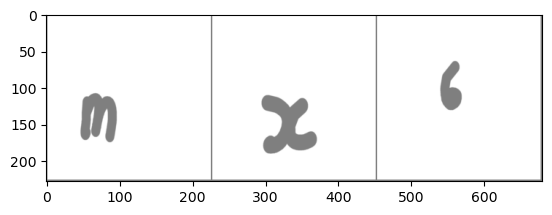

Training Labels: m x 6


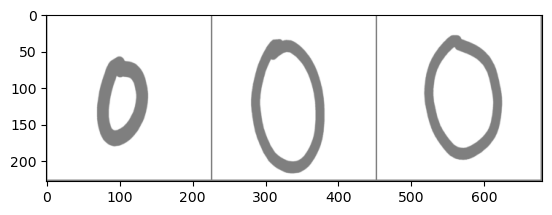

Testing Labels: 0 0 0


In [13]:
# Function to display images
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Plot random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)
imshow(utils.make_grid(images[:3]))
print('Training Labels:', ' '.join(f'{train_dataset.classes[labels[j]]}' for j in range(3)))

# Plot random testing images
dataiter = iter(test_loader)
images, labels = next(dataiter)
imshow(utils.make_grid(images[:3]))
print('Testing Labels:', ' '.join(f'{test_dataset.classes[labels[j]]}' for j in range(3)))